# Bootstrapping a Ibor Curve

Constructing a Ibor curve from a combination of deposits and swaps

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.utils import *
from financepy.products.rates import *

####################################################################
# FINANCEPY BETA Version 0.191 - This build:  17 Jan 2021 at 21:17 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy  #
#      Send any bug reports or comments to quant@financepy.com     #
####################################################################



In [3]:
valuation_date = Date(9, 8, 2019)
spot_days = 2
settlement_date = valuation_date.add_days(spot_days)

## Ibor Deposits

In [4]:
dcType = DayCountTypes.ACT_360

In [5]:
depo1 = IborDeposit(settlement_date, "1M", 0.022009, dcType)
depo2 = IborDeposit(settlement_date, "2M", 0.022138, dcType)
depo3 = IborDeposit(settlement_date, "3M", 0.021810, dcType)
depo4 = IborDeposit(settlement_date, "6M", 0.020503, dcType)
depo5 = IborDeposit(settlement_date, "12M", 0.019930, dcType)

In [6]:
depos = [depo1,depo2,depo3,depo4,depo5]

In [7]:
dcType = DayCountTypes.THIRTY_E_360_ISDA
fixedFreq = FrequencyTypes.SEMI_ANNUAL

## Interest Rate Swaps

In [8]:
dcType = DayCountTypes.THIRTY_E_360_ISDA
fixedFreq = FrequencyTypes.SEMI_ANNUAL
swapType = SwapTypes.PAY

In [9]:
swap1 = IborSwap(settlement_date,"2Y",swapType,0.015910,fixedFreq,dcType)
swap2 = IborSwap(settlement_date,"3Y",swapType,0.014990,fixedFreq,dcType)
swap3 = IborSwap(settlement_date,"4Y",swapType,0.014725,fixedFreq,dcType)
swap4 = IborSwap(settlement_date,"5Y",swapType,0.014640,fixedFreq,dcType)
swap5 = IborSwap(settlement_date,"6Y",swapType,0.014800,fixedFreq,dcType)
swap6 = IborSwap(settlement_date,"7Y",swapType,0.014995,fixedFreq,dcType)
swap7 = IborSwap(settlement_date,"8Y",swapType,0.015180,fixedFreq,dcType)
swap8 = IborSwap(settlement_date,"9Y",swapType,0.015610,fixedFreq,dcType)
swap9 = IborSwap(settlement_date,"10Y",swapType,0.0159880,fixedFreq,dcType)
swap10 = IborSwap(settlement_date,"12Y",swapType,0.016430,fixedFreq,dcType)

In [10]:
swaps = [swap1,swap2,swap3,swap4,swap5,swap6,swap7,swap8,swap9,swap10]

In [11]:
fras = []

# Bootstrapping The Curve

In [12]:
libor_curve = IborSingleCurve(valuation_date, depos, fras, swaps)

Can we show that the Ibor deposits have been repriced at par

In [13]:
for depo in depos:
    v = depo.value(settlement_date, libor_curve)
    print(depo._notional, depo._maturity_date, v)

100.0 11-AUG-2019 100.0
100.0 11-SEP-2019 100.0
100.0 11-OCT-2019 100.0
100.0 11-NOV-2019 99.99999999999999
100.0 11-FEB-2020 99.99999999999999
100.0 11-AUG-2020 100.0


In [14]:
for swap in swaps:
    v = swap.value(settlement_date, libor_curve, libor_curve, None)
    print(swap._maturity_date, v)

11-AUG-2021 -1.5327786968555301e-06
11-AUG-2022 -1.93630694411695e-06
11-AUG-2023 -2.2433887352235615e-06
12-AUG-2024 -2.365020918659866e-06
11-AUG-2025 -2.9940856620669365e-06
11-AUG-2026 -3.442735760472715e-06
11-AUG-2027 -3.6851270124316216e-06
11-AUG-2028 -6.043919711373746e-06
13-AUG-2029 -6.750895408913493e-06
11-AUG-2031 -8.731149137020111e-11


Looks good!

## The Forward Curve

In [15]:
years = np.linspace(0, 15.0, 200)
dates = settlement_date.add_years(years)
fwds = libor_curve.fwd(dates)

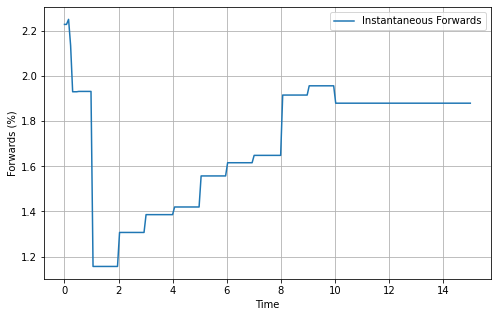

In [16]:
plt.figure(figsize=(8,5))
plt.plot(years,fwds*100, label="Instantaneous Forwards")
plt.xlabel("Time")
plt.ylabel("Forwards (%)")
plt.legend()
plt.grid()

Zoom in one the short end

In [17]:
years = np.linspace(0,1.0,1000)
dates = settlement_date.add_years(years)
fwds = libor_curve.fwd(dates)

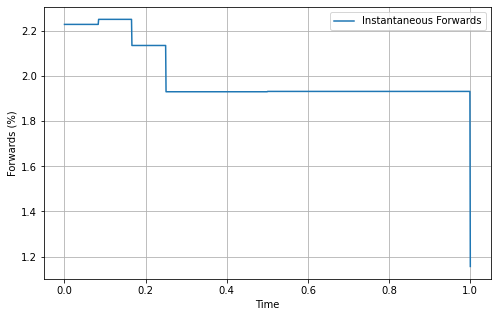

In [18]:
plt.figure(figsize=(8,5))
plt.plot(years,fwds*100, label="Instantaneous Forwards")
plt.xlabel("Time")
plt.ylabel("Forwards (%)")
plt.legend()
plt.grid()

## Extracting the Zero Rate Curves

We choose a range of zero rate frequencies.

In [19]:
years = np.linspace(1/365,5,100)
dates = settlement_date.add_years(years)
zerosC = libor_curve.zero_rate(dates, FrequencyTypes.CONTINUOUS)
zeros1 = libor_curve.zero_rate(dates, FrequencyTypes.ANNUAL)
zeros2 = libor_curve.zero_rate(dates, FrequencyTypes.SEMI_ANNUAL)
zeros4 = libor_curve.zero_rate(dates, FrequencyTypes.QUARTERLY)

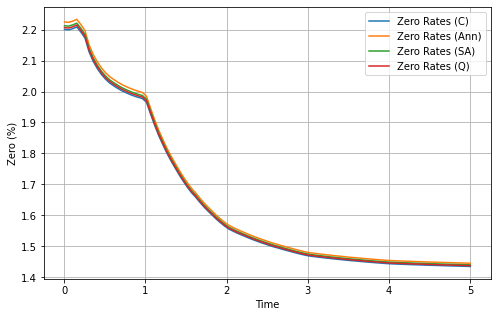

In [20]:
plt.figure(figsize=(8,5))
plt.plot(years,zerosC*100, label="Zero Rates (C)")
plt.plot(years,zeros1*100, label="Zero Rates (Ann)")
plt.plot(years,zeros2*100, label="Zero Rates (SA)")
plt.plot(years,zeros4*100, label="Zero Rates (Q)")
plt.xlabel("Time")
plt.ylabel("Zero (%)")
plt.legend()
plt.grid()

Copyright (c) 2020 Dominic O'Kane